# Exercise 3 - MLP (Multi-Layer Perceptron)
*Author: Leonardo Teixeira*

In [33]:
import numpy as np
import pandas as pd

## 1) Manual Calculation of MLP Steps

In [34]:
x = np.array([0.5, -0.2])
y_true = 1

W1 = np.array([[0.3, -0.1], 
               [0.2, 0.4]])
b1 = [0.1, -0.2]

W2 = np.array([0.5, -0.3])
b2 = 0.2

learning_rate = 0.3

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [35]:
# Forward Pass
# 1. Compute the hidden layers pre-activation
# Produto linear
z1 = np.dot(W1, x) + b1

# 2. Hidden layer activation
a = tanh(z1)

# 3. Output layer pre-activation
z2 = np.dot(W2, a) + b2

# 4. Final Output
y_pred = tanh(z2)

print("z1 (hidden layers pre-activation):", z1)
print("a (hidden layer activation):", a)
print("z2 (output layer pre-activation):", z2)
print("y_pred (final output):", y_pred)


z1 (hidden layers pre-activation): [ 0.27 -0.18]
a (hidden layer activation): [ 0.26362484 -0.17808087]
z2 (output layer pre-activation): 0.38523667817130075
y_pred (final output): 0.36724656264510797


In [36]:
# Loss Calculation
# Funcao de perda (MSE com 1 exemplo)

N = 1

L = (1 / N) * (y_true - y_pred) ** 2

print("L (loss):", L)

L (loss): 0.4003769124844312


In [37]:
# Backward Pass (Backpropagation)
# 1. dL/dy_pred
dL_dy = 2 * (y_pred - y_true)

# 2. dL/dz2
dL_dz2 = dL_dy * tanh_derivative(z2)

# 3. Gradients for output layer
dL_dW2 = dL_dz2 * a
dL_db2 = dL_dz2

# 4. Hidden layer propagations
dL_da = W2 * dL_dz2
dL_dz1 = dL_da * tanh_derivative(z1)

# 5. Hidden layer gradients
dL_dW1 = np.outer(dL_dz1, x)
dL_db1 = dL_dz1

print("Output gradient - dL/dW2:", dL_dW2)
print("Output gradient - dL/db2:", dL_db2)
print("Hidden gradient - dL/dW1:\n", dL_dW1)
print("Hidden gradient - dL/db1:", dL_db1)

Output gradient - dL/dW2: [-0.28862383  0.19496791]
Output gradient - dL/db2: -1.0948279147135995
Hidden gradient - dL/dW1:
 [[-0.25468488  0.10187395]
 [ 0.15901618 -0.06360647]]
Hidden gradient - dL/db1: [-0.50936975  0.31803236]


In [38]:
# Output layer
W2_new = W2 - learning_rate * dL_dW2
b2_new = b2 - learning_rate * dL_db2

# Hidden layer
W1_new = W1 - learning_rate * dL_dW1
b1_new = b1 - learning_rate * dL_db1

print("New W2:", W2_new)
print("New b2:", b2_new)
print("New W1:\n", W1_new)
print("New b1:", b1_new)

New W2: [ 0.58658715 -0.35849037]
New b2: 0.5284483744140799
New W1:
 [[ 0.37640546 -0.13056219]
 [ 0.15229515  0.41908194]]
New b1: [ 0.25281093 -0.29540971]


In [39]:
data = {
    "Param": ["W2[0]", "W2[1]", "b2", 
                  "W1[0,0]", "W1[0,1]", "W1[1,0]", "W1[1,1]", 
                  "b1[0]", "b1[1]"],
    
    "Inicial": [W2[0], W2[1], b2, 
                W1[0,0], W1[0,1], W1[1,0], W1[1,1], 
                b1[0], b1[1]],
    
    "Updated": [W2_new[0], W2_new[1], b2_new, 
                   W1_new[0,0], W1_new[0,1], W1_new[1,0], W1_new[1,1], 
                   b1_new[0], b1_new[1]]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Param,Inicial,Updated
0,W2[0],0.5,0.586587
1,W2[1],-0.3,-0.358490
2,b2,0.2,0.528448
3,"W1[0,0]",0.3,0.376405
4,"W1[0,1]",-0.1,-0.130562
5,"W1[1,0]",0.2,0.152295
6,"W1[1,1]",0.4,0.419082
7,b1[0],0.1,0.252811
8,b1[1],-0.2,-0.295410


## 2) Binary Classification with Synthetic Data and Scratch MLP

In [40]:
# 1. Generate and split the data into training (80%) and testing (20%) sets.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Update N for this section
N = 1000

# Generate class 0 with 1 cluster
X0, y0 = make_classification(n_samples=500, n_features=2, 
                             n_informative=2, n_redundant=0, 
                             n_clusters_per_class=1, n_classes=2, 
                             weights=[1.0, 0.0], # força tudo em uma classe
                             class_sep=1.5, random_state=42)

# Generate class 1 with 2 clusters
X1, y1 = make_classification(n_samples=500, n_features=2, 
                             n_informative=2, n_redundant=0, 
                             n_clusters_per_class=2, n_classes=2, 
                             weights=[0.0, 1.0], # força tudo na outra classe
                             class_sep=1.5, random_state=24)

# Combine the datasets
X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Feature dimensions: {X_train.shape[1]}")


Training set size: 800
Testing set size: 200
Feature dimensions: 2


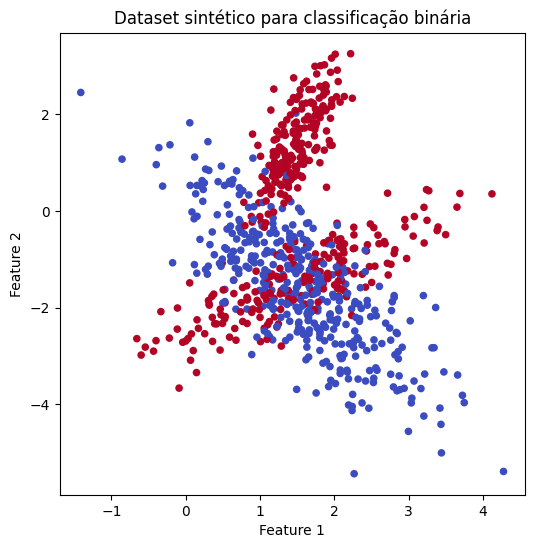

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
plt.title("Dataset sintético para classificação binária")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [42]:
import numpy as np

# Architecture
input_size = 2
hidden_size = 4
output_size = 1

# Weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
b2 = np.zeros((output_size, 1))

print("Dimensions:")
print(f"W1: {W1.shape}, b1: {b1.shape}")
print(f"W2: {W2.shape}, b2: {b2.shape}")

Dimensions:
W1: (4, 2), b1: (4, 1)
W2: (1, 4), b2: (1, 1)


In [43]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    # Hidden layer
    z1 = np.dot(W1, X.T) + b1  # Shape: (hidden_size, N)
    a1 = tanh(z1)              # Shape: (hidden_size, N)
    
    # Output layer
    z2 = np.dot(W2, a1) + b2   # Shape: (output_size, N)
    a2 = sigmoid(z2)           # Shape: (output_size, N)
    
    return z1, a1, z2, a2

In [44]:
# X_train vem do dataset que já dividimos
Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)

print("Neural Network Output for the first 10 examples:")
print(A2.flatten()[:10])


Neural Network Output for the first 10 examples:
[0.43038448 0.4928931  0.39245943 0.39138581 0.39119215 0.48485004
 0.34393026 0.43490979 0.38371192 0.52421808]


In [45]:
def binary_cross_entropy(y_true, y_pred):
    # To avoid log(0), we clip the predictions
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    y_pred = y_pred.flatten()  # Garantir shape (N,)
    m = y_true.shape[0]
    loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [46]:
loss = binary_cross_entropy(y_train, A2)

print(f"Training loss: {loss}")


Training loss: 0.6443503641534776


In [47]:
def backward_pass(X, y_true, Z1, A1, Z2, A2, W2):
    m = X.shape[0]
    
    # Output layer
    dZ2 = A2 - y_true.reshape(1, -1)          # shape (1, m)
    dW2 = (1/m) * np.dot(dZ2, A1.T)           # shape (1, hidden_size)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # shape (1,1)
    
    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)                   # shape (hidden_size, m)
    dZ1 = dA1 * tanh_derivative(A1)           # tanh derivative applied to A1
    dW1 = (1/m) * np.dot(dZ1, X)              # shape (hidden_size, input_size)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

In [48]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [49]:
epochs = 500
learning_rate = 0.1
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
    
    # Loss
    loss = binary_cross_entropy(y_train, A2)
    losses.append(loss)
    
    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, A2, W2)
    
    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.6443503641534776
Epoch 10, Loss: 0.6179961623054703
Epoch 20, Loss: 0.6009435411880102
Epoch 30, Loss: 0.5896827506695688
Epoch 40, Loss: 0.582169755236895
Epoch 50, Loss: 0.5770648955839456
Epoch 60, Loss: 0.5734788573988905
Epoch 70, Loss: 0.5708359735204528
Epoch 80, Loss: 0.5687725741037378
Epoch 90, Loss: 0.5670625353564961
Epoch 100, Loss: 0.5655665772589119
Epoch 110, Loss: 0.5641994378587536
Epoch 120, Loss: 0.5629092011500454
Epoch 130, Loss: 0.5616644519947154
Epoch 140, Loss: 0.5604463383061377
Epoch 150, Loss: 0.559243672061312
Epoch 160, Loss: 0.5580499035064846
Epoch 170, Loss: 0.556861250252348
Epoch 180, Loss: 0.5556755410624841
Epoch 190, Loss: 0.5544915048342572
Epoch 200, Loss: 0.5533083391770839
Epoch 210, Loss: 0.552125455902641
Epoch 220, Loss: 0.5509423387825552
Epoch 230, Loss: 0.5497584720763554
Epoch 240, Loss: 0.5485733126688537
Epoch 250, Loss: 0.5473862878119009
Epoch 260, Loss: 0.5461968065446111
Epoch 270, Loss: 0.5450042770501294
Epoch 2

In [50]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 >= 0.5).astype(int) # threshold 0.5

def accuracy(X, y, W1, b1, W2, b2):
    y_pred = predict(X, W1, b1, W2, b2)
    return np.mean(y_pred.flatten() == y.flatten())

train_acc = accuracy(X_train, y_train, W1, b1, W2, b2)
test_acc = accuracy(X_test, y_test, W1, b1, W2, b2)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

Training accuracy: 0.7300
Testing accuracy: 0.6800


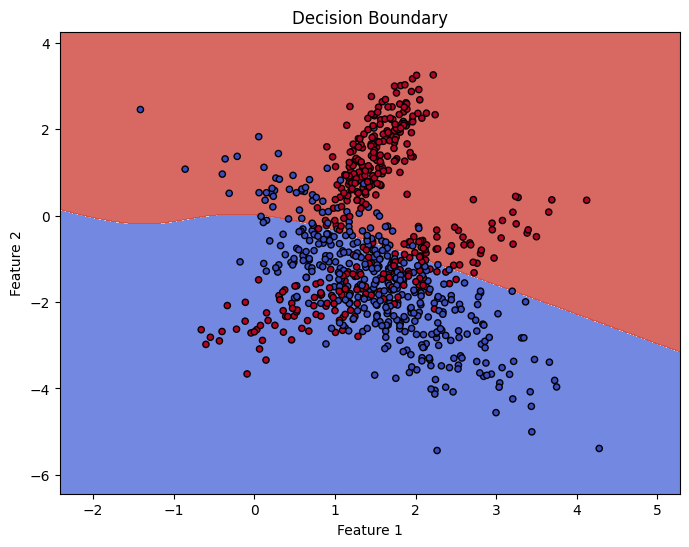

In [51]:
# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid_points, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, s=20)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [52]:
class MLP:
    def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.1, random_seed=42):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Weights and biases
        np.random.seed(random_seed)
        self.W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
        self.b1 = np.zeros((hidden_size, 1))
        
        self.W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((output_size, 1))
    
    def tanh(self, z):
        return np.tanh(z)
    
    def tanh_derivative(self, z):
        return 1 - np.tanh(z)**2
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward_pass(self, X):
        # Hidden layer
        z1 = np.dot(self.W1, X.T) + self.b1  # Shape: (hidden_size, N)
        a1 = self.tanh(z1)                    # Shape: (hidden_size, N)
        
        # Output layer
        z2 = np.dot(self.W2, a1) + self.b2   # Shape: (output_size, N)
        a2 = self.sigmoid(z2)                # Shape: (output_size, N)
        
        return z1, a1, z2, a2
    
    def binary_cross_entropy(self, y_true, y_pred):
        # To avoid log(0), we clip the predictions
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        y_pred = y_pred.flatten()  # Garantir shape (N,)
        m = y_true.shape[0]
        loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def backward_pass(self, X, y_true, Z1, A1, Z2, A2):
        m = X.shape[0]
        
        # Output layer
        dZ2 = A2 - y_true.reshape(1, -1)          # shape (1, m)
        dW2 = (1/m) * np.dot(dZ2, A1.T)           # shape (1, hidden_size)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # shape (1,1)
        
        # Hidden layer
        dA1 = np.dot(self.W2.T, dZ2)              # shape (hidden_size, m)
        dZ1 = dA1 * self.tanh_derivative(A1)      # tanh derivative applied to A1
        dW1 = (1/m) * np.dot(dZ1, X)              # shape (hidden_size, input_size)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def predict(self, X):
        _, _, _, A2 = self.forward_pass(X)
        return (A2 >= 0.5).astype(int) # threshold 0.5
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred.flatten() == y.flatten())
    
    def fit(self, X, y, epochs=500):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            Z1, A1, Z2, A2 = self.forward_pass(X)
            
            # Loss
            loss = self.binary_cross_entropy(y, A2)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(X, y, Z1, A1, Z2, A2)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

In [53]:
model = MLP(learning_rate=0.1)
losses = model.fit(X_train, y_train, epochs=500)

Epoch 0, Loss: 0.6443503641534776
Epoch 10, Loss: 0.6179961623054703
Epoch 20, Loss: 0.6009435411880102
Epoch 30, Loss: 0.5896827506695688
Epoch 40, Loss: 0.582169755236895
Epoch 50, Loss: 0.5770648955839456
Epoch 60, Loss: 0.5734788573988905
Epoch 70, Loss: 0.5708359735204528
Epoch 80, Loss: 0.5687725741037378
Epoch 90, Loss: 0.5670625353564961
Epoch 100, Loss: 0.5655665772589119
Epoch 110, Loss: 0.5641994378587536
Epoch 120, Loss: 0.5629092011500454
Epoch 130, Loss: 0.5616644519947154
Epoch 140, Loss: 0.5604463383061377
Epoch 150, Loss: 0.559243672061312
Epoch 160, Loss: 0.5580499035064846
Epoch 170, Loss: 0.556861250252348
Epoch 180, Loss: 0.5556755410624841
Epoch 190, Loss: 0.5544915048342572
Epoch 200, Loss: 0.5533083391770839
Epoch 210, Loss: 0.552125455902641
Epoch 220, Loss: 0.5509423387825552
Epoch 230, Loss: 0.5497584720763554
Epoch 240, Loss: 0.5485733126688537
Epoch 250, Loss: 0.5473862878119009
Epoch 260, Loss: 0.5461968065446111
Epoch 270, Loss: 0.5450042770501294
Epoch 2

In [54]:
model.accuracy(X_train, y_train), model.accuracy(X_test, y_test)

(np.float64(0.73), np.float64(0.68))

## 3) Multi-Class Classification with Synthetic Data and Reusable MLP

In [55]:
# 1. Generate and split the data into training (80%) and testing (20%) sets.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Update N for this section
N = 1500

# Generate class 0 with 2 clusters
X0, y0 = make_classification(n_samples=N//3, n_features=4, 
                             n_informative=4, n_redundant=0, 
                             n_clusters_per_class=2, n_classes=3, 
                             weights=[1.0, 0.0, 0.0], # força tudo em uma classe
                             class_sep=1.5, random_state=42)

# Generate class 1 with 3 clusters
X1, y1 = make_classification(n_samples=N//3, n_features=4, 
                             n_informative=4, n_redundant=0, 
                             n_clusters_per_class=3, n_classes=3, 
                             weights=[0.0, 1.0, 0.0], # força tudo na outra classe
                             class_sep=1.5, random_state=24)

# Generate class 2 with 4 clusters
X2, y2 = make_classification(n_samples=N//3, n_features=4, 
                             n_informative=4, n_redundant=0, 
                             n_clusters_per_class=4, n_classes=3, 
                             weights=[0.0, 0.0, 1.0], # força tudo na terceira classe
                             class_sep=1.5, random_state=100)

# Combine the datasets
X = np.vstack((X0, X1, X2))
y = np.concatenate((y0, y1, y2))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Feature dimensions: {X_train.shape[1]}")


Training set size: 1200
Testing set size: 300
Feature dimensions: 4


In [56]:
class ReusableMLP:
    def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.1, random_seed=42):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Weights and biases
        np.random.seed(random_seed)
        self.W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
        self.b1 = np.zeros((hidden_size, 1))
        
        self.W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((output_size, 1))
    
    def tanh(self, z):
        return np.tanh(z)
    
    def tanh_derivative(self, z):
        return 1 - np.tanh(z)**2
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability improvement
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
    def forward_pass(self, X):
        # Hidden layer
        z1 = np.dot(self.W1, X.T) + self.b1  # Shape: (hidden_size, N)
        a1 = self.tanh(z1)                    # Shape: (hidden_size, N)
        
        # Output layer
        z2 = np.dot(self.W2, a1) + self.b2   # Shape: (output_size, N)
        if self.output_size > 1:
            a2 = self.softmax(z2)             # For multi-class classification
        else:
            a2 = self.sigmoid(z2)                # Shape: (output_size, N)
        
        return z1, a1, z2, a2
    
    def binary_cross_entropy(self, y_true, y_pred):
        # To avoid log(0), we clip the predictions
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        y_pred = y_pred.flatten()  # Garantir shape (N,)
        m = y_true.shape[0]
        loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def categorical_cross_entropy(self, y_true, y_pred):
        # To avoid log(0), we clip the predictions
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        m = y_true.shape[0]
        # Convert y_true to one-hot encoding
        y_one_hot = np.zeros((self.output_size, m))
        y_one_hot[y_true, np.arange(m)] = 1
        loss = - (1/m) * np.sum(y_one_hot * np.log(y_pred))
        return loss
    
    def backward_pass(self, X, y_true, Z1, A1, Z2, A2):
        m = X.shape[0]
        
        if self.output_size > 1:
            # Multi-class classification - different gradient calculation
            # Convert y_true to one-hot encoding for proper gradient calculation
            y_one_hot = np.zeros((self.output_size, m))
            y_one_hot[y_true, np.arange(m)] = 1
            dZ2 = A2 - y_one_hot                      # shape (output_size, m)
        else:
            # Binary classification
            dZ2 = A2 - y_true.reshape(1, -1)          # shape (1, m)
        
        dW2 = (1/m) * np.dot(dZ2, A1.T)           # shape (output_size, hidden_size)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # shape (output_size, 1)
        
        # Hidden layer
        dA1 = np.dot(self.W2.T, dZ2)              # shape (hidden_size, m)
        dZ1 = dA1 * self.tanh_derivative(A1)      # tanh derivative applied to A1
        dW1 = (1/m) * np.dot(dZ1, X)              # shape (hidden_size, input_size)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def predict(self, X):
        _, _, _, A2 = self.forward_pass(X)
        if self.output_size > 1:
            # Multi-class: return the class with highest probability
            return np.argmax(A2, axis=0)
        else:
            # Binary classification: threshold 0.5
            return (A2 >= 0.5).astype(int).flatten()
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def fit(self, X, y, epochs=500):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            Z1, A1, Z2, A2 = self.forward_pass(X)
            
            # Loss
            # Compute, but now with conditional
            if self.output_size > 1:
                # For multi-class, we would use categorical cross-entropy
                loss = self.categorical_cross_entropy(y, A2)
            else:
                loss = self.binary_cross_entropy(y, A2)
            
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(X, y, Z1, A1, Z2, A2)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

In [57]:
# Instantiate another model, with different architecture
model = ReusableMLP(input_size=4, hidden_size=16, output_size=3, learning_rate=0.05)
losses = model.fit(X_train, y_train, epochs=500)

Epoch 0, Loss: 1.4256929026613456
Epoch 100, Loss: 0.6458717876234992
Epoch 200, Loss: 0.6211233281261626
Epoch 300, Loss: 0.6013055253704358
Epoch 200, Loss: 0.6211233281261626
Epoch 300, Loss: 0.6013055253704358
Epoch 400, Loss: 0.5839618788641519
Epoch 400, Loss: 0.5839618788641519


In [58]:
# Test accuracy
train_accuracy = model.accuracy(X_train, y_train)
test_accuracy = model.accuracy(X_test, y_test)

print(f"\nTraining accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Training accuracy: 0.7383
Test accuracy: 0.7167


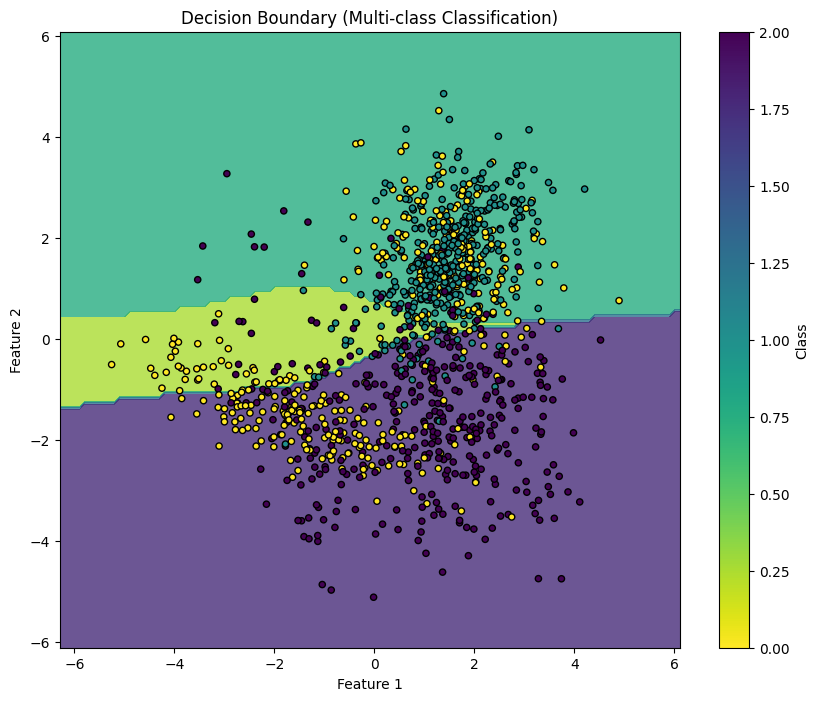

In [59]:
# Decision boundary visualization for multi-class classification
# Note: We can only visualize 2D, so we'll use the first 2 features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create grid points with 4 features (padding the last 2 with zeros or means)
grid_2d = np.c_[xx.ravel(), yy.ravel()]
# Pad with mean values of features 2 and 3 from training data
grid_4d = np.column_stack([grid_2d, 
                          np.full(grid_2d.shape[0], X_train[:, 2].mean()),
                          np.full(grid_2d.shape[0], X_train[:, 3].mean())])

# Get predictions using the trained model
Z = model.predict(grid_4d)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis_r', levels=3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='viridis_r', s=20)
plt.title("Decision Boundary (Multi-class Classification)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

---

## 4) Multi-Class Classification with Deeper MLP

In [60]:
class MLPDeep:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, lr=0.1, seed=42):
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.lr = lr
        
        np.random.seed(seed)
        # Xavier initialization
        self.W1 = np.random.randn(hidden1_size, input_size) / np.sqrt(input_size)
        self.b1 = np.zeros((hidden1_size, 1))
        
        self.W2 = np.random.randn(hidden2_size, hidden1_size) / np.sqrt(hidden1_size)
        self.b2 = np.zeros((hidden2_size, 1))
        
        self.W3 = np.random.randn(output_size, hidden2_size) / np.sqrt(hidden2_size)
        self.b3 = np.zeros((output_size, 1))

    def _tanh(self, z):
        return np.tanh(z)

    def _tanh_deriv(self, a):
        return 1 - np.power(a, 2)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # estabilidade numérica
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def forward(self, X):
        # First hidden layer
        self.Z1 = np.dot(self.W1, X.T) + self.b1
        self.A1 = self._tanh(self.Z1)
        
        # Second hidden layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self._tanh(self.Z2)
        
        # Output layer
        self.Z3 = np.dot(self.W3, self.A2) + self.b3
        if self.output_size > 1:
            self.A3 = self._softmax(self.Z3)  # Multi-class classification
        else:
            self.A3 = self._sigmoid(self.Z3)  # Binary classification
        
        return self.A3

    def binary_cross_entropy(self, y_true, y_pred):
        # To avoid log(0), we clip the predictions
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        y_pred = y_pred.flatten()  # Garantir shape (N,)
        m = y_true.shape[0]
        loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def categorical_cross_entropy(self, y_true, y_pred):
        # To avoid log(0), we clip the predictions
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        m = y_true.shape[0]
        # Convert y_true to one-hot encoding
        y_one_hot = np.zeros((self.output_size, m))
        y_one_hot[y_true, np.arange(m)] = 1
        loss = - (1/m) * np.sum(y_one_hot * np.log(y_pred))
        return loss

    def compute_loss(self, y_true, y_pred):
        if self.output_size > 1:
            return self.categorical_cross_entropy(y_true, y_pred)
        else:
            return self.binary_cross_entropy(y_true, y_pred)

    def backward(self, X, y_true):
        m = X.shape[0]

        if self.output_size > 1:
            # Multi-class classification - convert y_true to one-hot encoding
            y_one_hot = np.zeros((self.output_size, m))
            y_one_hot[y_true, np.arange(m)] = 1
            dZ3 = self.A3 - y_one_hot
        else:
            # Binary classification
            dZ3 = self.A3 - y_true.reshape(1, -1)

        # Output layer gradients
        dW3 = (1/m) * np.dot(dZ3, self.A2.T)
        db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

        # Hidden layer 2 gradients
        dA2 = np.dot(self.W3.T, dZ3)
        dZ2 = dA2 * self._tanh_deriv(self.A2)
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Hidden layer 1 gradients
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self._tanh_deriv(self.A1)
        dW1 = (1/m) * np.dot(dZ1, X)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Update parameters
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3

    def predict(self, X):
        probs = self.forward(X)
        if self.output_size > 1:
            # Multi-class: return the class with highest probability
            return np.argmax(probs, axis=0)
        else:
            # Binary classification: threshold 0.5
            return (probs >= 0.5).astype(int).flatten()

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def fit(self, X, y, epochs=500):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")
        
        return losses

In [61]:
# Instantiate the deeper model with 2 hidden layers
model_deep = MLPDeep(input_size=4, hidden1_size=16, hidden2_size=8, output_size=3, lr=0.05)
losses = model_deep.fit(X_train, y_train, epochs=500)

# Test accuracy
train_accuracy = model_deep.accuracy(X_train, y_train)
test_accuracy = model_deep.accuracy(X_test, y_test)

print(f"\nTraining accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Compare predictions with the shallow model
print(f"\nComparison:")
print(f"Shallow model (2-layer) - Train: {model.accuracy(X_train, y_train):.4f}, Test: {model.accuracy(X_test, y_test):.4f}")
print(f"Deep model (3-layer) - Train: {train_accuracy:.4f}, Test: {test_accuracy:.4f}")

Epoch 0, Loss: 1.1712082942356112
Epoch 100, Loss: 0.6448158487312242
Epoch 200, Loss: 0.584281393337696
Epoch 300, Loss: 0.5527529526884267
Epoch 200, Loss: 0.584281393337696
Epoch 300, Loss: 0.5527529526884267
Epoch 400, Loss: 0.5315851864044218

Training accuracy: 0.7675
Test accuracy: 0.7300

Comparison:
Shallow model (2-layer) - Train: 0.7383, Test: 0.7167
Deep model (3-layer) - Train: 0.7675, Test: 0.7300
Epoch 400, Loss: 0.5315851864044218

Training accuracy: 0.7675
Test accuracy: 0.7300

Comparison:
Shallow model (2-layer) - Train: 0.7383, Test: 0.7167
Deep model (3-layer) - Train: 0.7675, Test: 0.7300


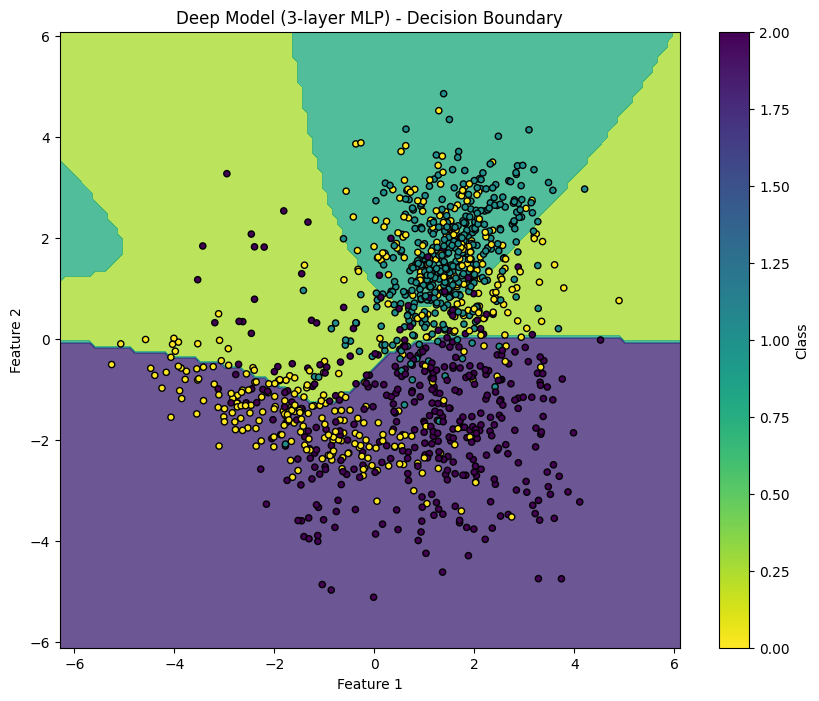


Model Architecture Comparison:
Shallow Model: Input(4) -> Hidden(16) -> Output(3)
  - Train Accuracy: 0.7383
  - Test Accuracy:  0.7167

Deep Model: Input(4) -> Hidden1(16) -> Hidden2(8) -> Output(3)
  - Train Accuracy: 0.7675
  - Test Accuracy:  0.7300

Note: Decision boundary shown using first 2 features only,
      with features 3 and 4 fixed at their mean values.


In [64]:
# Decision boundary visualization for the deeper MLP model
# Note: We can only visualize 2D, so we'll use the first 2 features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create grid points with 4 features (padding the last 2 with mean values)
grid_2d = np.c_[xx.ravel(), yy.ravel()]
# Pad with mean values of features 2 and 3 from training data
grid_4d = np.column_stack([grid_2d, 
                          np.full(grid_2d.shape[0], X_train[:, 2].mean()),
                          np.full(grid_2d.shape[0], X_train[:, 3].mean())])

# Get predictions using the deep model
Z_deep = model_deep.predict(grid_4d)
Z_deep = Z_deep.reshape(xx.shape)

# Create the visualization
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_deep, alpha=0.8, cmap='viridis_r', levels=3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='viridis_r', s=20)
plt.title("Deep Model (3-layer MLP) - Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

# Print comparison summary
print("\nModel Architecture Comparison:")
print("=" * 50)
print(f"Shallow Model: Input(4) -> Hidden(16) -> Output(3)")
print(f"  - Train Accuracy: {model.accuracy(X_train, y_train):.4f}")
print(f"  - Test Accuracy:  {model.accuracy(X_test, y_test):.4f}")
print()
print(f"Deep Model: Input(4) -> Hidden1(16) -> Hidden2(8) -> Output(3)")
print(f"  - Train Accuracy: {model_deep.accuracy(X_train, y_train):.4f}")
print(f"  - Test Accuracy:  {model_deep.accuracy(X_test, y_test):.4f}")
print()
print("Note: Decision boundary shown using first 2 features only,")
print("      with features 3 and 4 fixed at their mean values.")